# Museum Data Analysis Project: Untangling The Mess

### Disclaimer: This work includes derogatory language that some people may find profane, vulgar, or offensive. The derogatory terms are used only for the purpose of finding them within museum collections. The inclusion of the offensive language is not meant to promote or condone any discriminatory or harmful beliefs. Reader discretion is advised.



### Inital loading of libraries 

In [3]:
# import libraries

import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)
import warnings 
  

warnings.filterwarnings('ignore') 

### Importing all object records from the database and saving to file

In [272]:
def append_records(df, url):
    """
    Loads one page of records from Harvard Art database and appends to a dataframe. 
    Usage:
    while url:
    df, url = append_records(df, url)

    Args:
        df: dataframe to append new records to
        url: url page to pull new records from

    Returns:
        df: new dataframe with added records
        url: url if next page is available, else None
    """
    
    r = requests.get(url)

    # Convert data to JSON format
    data = r.json()
    
    # Extract the info 
    info = data['info']

    # concat dataframe
    df2 = pd.DataFrame(data['records'])
    df = pd.concat([df, df2], axis = 0)

    
    # Error handling if it reaches >10,000 records
    try:
        if (info['next']):
            url = info['next']
    except:
        return df, None
    return df, url


In [101]:
# create inital dataframe
df = pd.DataFrame()
    
# Find all recorded views 
url = 'https://api.harvardartmuseums.org/object?&apikey=4e902ba5-088c-41a0-9a1d-1143c17d8807&size=100'

# build dataframe from query
while url:
    df, url = append_records(df, url)

In [103]:
df.shape
df.to_csv('objects.csv')

In [26]:
#load to dataframe
df = pd.read_csv('objects.csv')

## We have sucess importing all 245,715 object records. 

In [29]:
print(f"We were able to import {df.shape[0]} records.")

We were able to import 245715 records.


### The fields available for each record are:

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245715 entries, 0 to 245714
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    245715 non-null  int64  
 1   copyright                     61838 non-null   object 
 2   contextualtextcount           245715 non-null  int64  
 3   creditline                    245715 non-null  object 
 4   accesslevel                   245715 non-null  int64  
 5   createdate                    245715 non-null  object 
 6   dateoflastpageview            203847 non-null  object 
 7   classificationid              245715 non-null  int64  
 8   division                      238118 non-null  object 
 9   markscount                    245715 non-null  int64  
 10  publicationcount              245715 non-null  int64  
 11  totaluniquepageviews          245715 non-null  int64  
 12  contact                       245700 non-nul

### The first 100 entries:

In [35]:
display(df.head(100))

,Unnamed: 0,copyright,contextualtextcount,creditline,accesslevel,createdate,dateoflastpageview,classificationid,division,markscount,publicationcount,totaluniquepageviews,contact,colorcount,rank,id,state,verificationleveldescription,period,images,worktypes,imagecount,totalpageviews,accessionyear,standardreferencenumber,signed,classification,relatedcount,verificationlevel,primaryimageurl,titlescount,peoplecount,style,lastupdate,commentary,periodid,technique,edition,description,medium,lendingpermissionlevel,title,accessionmethod,colors,provenance,groupcount,dated,department,dateend,people,url,dateoffirstpageview,century,objectnumber,labeltext,datebegin,culture,exhibitioncount,imagepermissionlevel,mediacount,objectid,techniqueid,dimensions,seeAlso,details,videos,audio
0,0,"© Artists Rights Society (ARS), New York / VG Bild-Kunst, Bonn",0,"Harvard Art Museums/Busch-Reisinger Museum, Gift of T. Lux Feininger",1,2006-01-20T00:00:00-05:00,2023-12-25,17,Modern and Contemporary Art,0,0,59,am_moderncontemporary@harvard.edu,3,194950,1412,NaN,Adequate. Object is adequately described but information may not be vetted,NaN,[],"[{'worktypeid': '266', 'worktype': 'photograph'}, {'worktypeid': '339', 'worktype': 'slide'}]",1,122,NaN,NaN,NaN,Photographs,1,2,NaN,1,1,NaN,2025-03-12T04:53:12-04:00,NaN,NaN,"Slide, 35 mm, black and white",NaN,Corresponds to negative BRLF.457.10,NaN,0,"[Buildings, Germany (Siemensstadt?)]",Gift,"[{'color': '#000000', 'spectrum': '#1eb264', 'hue': 'Black', 'percent': 0.6587987987987988, 'css...",NaN,2,1940s-1950s,Busch-Reisinger Museum,1959,"[{'role': 'Artist', 'birthplace': 'New York, NY', 'gender': 'male', 'displaydate': '1871 - 1956'...",https://www.harvardartmuseums.org/collections/object/1412,2009-05-12,20th century,BRLF.1002.214,NaN,1940,American,0,1,0,1412,220.0,3 x 3.5 cm (1 3/16 x 1 3/8 in.),"[{'id': 'https://iiif.harvardartmuseums.org/manifests/object/1412', 'type': 'IIIF Manifest', 'fo...",NaN,NaN,NaN
1,1,"© Artists Rights Society (ARS), New York / VG Bild-Kunst, Bonn",0,"Harvard Art Museums/Busch-Reisinger Museum, Gift of T. Lux Feininger",1,2006-01-20T00:00:00-05:00,2023-04-16,17,Modern and Contemporary Art,0,0,27,am_moderncontemporary@harvard.edu,8,194951,1413,NaN,Adequate. Object is adequately described but information may not be vetted,NaN,[],"[{'worktypeid': '339', 'worktype': 'slide'}, {'worktypeid': '266', 'worktype': 'photograph'}]",1,63,NaN,NaN,NaN,Photographs,1,2,NaN,1,1,NaN,2025-03-12T04:53:12-04:00,NaN,NaN,"Slide, 35 mm, black and white",NaN,Corresponds to negative BRLF.196.13,NaN,0,"[Buildings, Stockholm, 1936]",Gift,"[{'color': '#323232', 'spectrum': '#2eb45d', 'hue': 'Grey', 'percent': 0.20660493827160495, 'css...",NaN,2,1940s-1950s,Busch-Reisinger Museum,1959,"[{'role': 'Artist', 'birthplace': 'New York, NY', 'gender': 'male', 'displaydate': '1871 - 1956'...",https://www.harvardartmuseums.org/collections/object/1413,2009-07-06,20th century,BRLF.1002.215,NaN,1940,American,0,1,0,1413,220.0,3 x 3.5 cm (1 3/16 x 1 3/8 in.),"[{'id': 'https://iiif.harvardartmuseums.org/manifests/object/1413', 'type': 'IIIF Manifest', 'fo...",NaN,NaN,NaN
2,2,"© Artists Rights Society (ARS), New York / VG Bild-Kunst, Bonn",0,"Harvard Art Museums/Busch-Reisinger Museum, Gift of T. Lux Feininger",1,2006-01-20T00:00:00-05:00,2023-01-13,17,Modern and Contemporary Art,0,0,61,am_moderncontemporary@harvard.edu,7,194958,1414,NaN,Adequate. Object is adequately described but information may not be vetted,NaN,[],"[{'worktypeid': '266', 'worktype': 'photograph'}, {'worktypeid': '339', 'worktype': 'slide'}]",1,110,NaN,NaN,NaN,Photographs,1,2,NaN,1,1,NaN,2025-03-12T04:53:12-04:00,NaN,NaN,"Slide, 35 mm, black and white",NaN,Corresponds to negative BRLF.413.6,NaN,0,"[Street scene, Berlin]",Gift,"[{'color': '#000000', 'spectrum': '#1eb264', 'hue': 'Black', 'percent': 0.2083809523809524, 'css...",NaN,2,1940s-1950s,Busch-Reisinger Museum,1959,"[{'role': 'Artist', 'birthplace': 'New York, NY', 'gender': 'male', 'displaydate': '1871 - 19

## The following is a list of record fields where bias may be found

* commentary
* description
* title
* labeltext



  

## The following is a list of non-biased record fields which may be informative in the analysis
* copyright
* creditline
* createdate
* division
* period
* totalpageviews
* acessionyear
* classification
* style
* technique
* medium
* accessionmethod
* provenance
* dateend
* people
* culture
* objectid (keep to reference with, each object has unique id)
* dimensions	

## The following is a list of record fields we can likely remove
* contextualtextcount
* accesslevel
* dateoflastpageview
* totaluniquepageviews
* markscount ? what is this
* publicationcount
* totaluniquepageviews
* contact
* colorcount
* rank
* id
* state (in reference to printmaking)
* verificationleveldescription
* images
* imagecount
* worktypes (similar to classification)
* imagecount
* classificationid (numerical representation of classification which we will keep)
* standardreferencenumber
* signed ? not sure if this could be evocative
* relatedcount
* verificationlevel
* primaryimageurl
* titlescount
* peoplecount
* lastupdate
* periodid ? not sure what this is
* edition
* lending permission level (most on level 0)
* colors
* groupcount ? (5 levels most are level 1 and 2)
* dated
* url
* dateoffirstpageview
* datebegin
* exhibitioncount
* imagepermissionlevel
* mediacount
* techniqueid
* seeAlso
* details
* videos
* audio

## To simplify processing lets identify fields that we can remove.


### Do we care about 'copywrite', 'creditline'?

In [40]:
print(df['copyright'].value_counts(dropna=False))
print(f"There are {len(df['copyright'].value_counts())} distinct copywrite entries.")

print(df['creditline'].value_counts())
print(f"There are {len(df['creditline'].value_counts(dropna=False))} distinct copywrite entries.")

copyright
NaN                                                               183877
© Artists Rights Society (ARS), New York / VG Bild-Kunst, Bonn     24945
© President and Fellows of Harvard College                          5492
© Estate of Joseph Janney Steinmetz                                 5416
© Otto Piene Estate                                                 4540
                                                                   ...  
© 1968 Luis Camnitzer                                                  1
© Timothy David Mayhew 2010                                            1
© Liang Studio                                                         1
© Henry Darger / Artists Rights Society (ARS), New York                1
© Yvonne Helene Jacquette                                              1
Name: count, Length: 1437, dtype: int64
There are 1436 distinct copywrite entries.
creditline
Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, Amer

### Not sure of the meaning of 'contextualtextcount' likely can be discarded

In [42]:
# not sure of the meaning of this
df['contextualtextcount'].value_counts(dropna=False)

contextualtextcount
0    244282
1      1431
2         2
Name: count, dtype: int64

### 'accesslevel' can be discarded due to having only one value

In [44]:
# all same value should discard
df['accesslevel'].value_counts(dropna=False)

accesslevel
1    245715
Name: count, dtype: int64

### 'createdate'may be relevant
Interesting to note: There are 14511 distinct dates. Some dates have a large numbers of entries. There are also inccorctly entered dates such as 1900-11-14

In [46]:
# 14511 dates total, 228 dates with entries >100, 2002, 2005, 1997 were big years
df['createdate'] = pd.to_datetime(df['createdate'], utc=True)
print(f"{df['createdate'].value_counts().count()} distinct dates")
print(df['createdate'].value_counts(dropna=False))
print(df['createdate'].min())

14511 distinct dates
createdate
2002-11-01 05:00:00+00:00    19837
2005-05-27 04:00:00+00:00    12195
1997-10-24 04:00:00+00:00     8329
1997-10-21 04:00:00+00:00     8179
1997-12-06 05:00:00+00:00     6263
                             ...  
2012-02-28 15:16:38+00:00        1
2006-07-03 18:45:55+00:00        1
2012-02-10 15:55:44+00:00        1
2012-02-10 15:03:14+00:00        1
1995-11-14 05:00:00+00:00        1
Name: count, Length: 14511, dtype: int64
1900-02-08 05:00:00+00:00


In [48]:
df['markscount'].value_counts(dropna=False)

markscount
0     204976
1      24222
2       8233
3       3690
4       2209
5       1061
6        534
7        332
8        175
9         95
10        52
11        50
12        31
13        23
14        11
15         5
17         3
18         2
19         2
16         2
23         1
24         1
22         1
21         1
20         1
26         1
34         1
Name: count, dtype: int64

In [50]:
df['period'].value_counts(dropna=False)

period
NaN                                                                 209285
Edo period, 1615-1868                                                 5561
Roman Imperial period                                                 3187
Qing dynasty, 1644-1911                                               1559
Roman Imperial period, Middle                                         1420
                                                                     ...  
Meroitic period                                                          1
Three Kingdoms period, 220-280 CE                                        1
Licchavi (5th-9th century) to Thakuri (9th-12th century) dynasty         1
Minoan period, Late Minoan IIIB                                          1
Minoan period, Middle Minoan III                                         1
Name: count, Length: 320, dtype: int64

In [120]:
df['images'].value_counts()[:5]

images
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                        58865
[{'date': '2008-03-12', 'copyright': 'President and Fellows of Harvard College', 'imageid': 294883, 'idsid': 20862999, 'format': 'image/jpeg', 'description': None, 'technique': None, 'renditionnumber': 'INV180154', 'displayorder': 1, 'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:INV180154_dynmc', 'alttext': None, 'width': 718, 'publiccaption': None, 'iiifbaseuri': 'https://ids.lib.harvard.edu/ids/iiif/20862999', 'height': 1024}]       48
[{'date': '2008-03-11', 'copyright': 'President and Fellows of Harvard College', 'imageid': 29471

In [52]:
df['worktypes'].value_counts(dropna=False)

worktypes
[{'worktypeid': '286', 'worktype': 'print'}]                                                                       66144
[{'worktypeid': '266', 'worktype': 'photograph'}]                                                                  28764
[{'worktypeid': '124', 'worktype': 'drawing'}]                                                                     23405
[{'worktypeid': '99', 'worktype': 'coin'}]                                                                         18055
[{'worktypeid': '239', 'worktype': 'negative'}, {'worktypeid': '266', 'worktype': 'photograph'}]                   17430
                                                                                                                   ...  
[{'worktypeid': '30', 'worktype': 'audio recording'}]                                                                  1
[{'worktypeid': '164', 'worktype': 'gravel'}, {'worktypeid': '299', 'worktype': 'raw material'}]                       1
[{'worktypeid': '381',

### 'style' could be of interest for analysis 

In [54]:
df['style'].value_counts(dropna=False)

style
NaN                            243464
Bauhaus                          1483
Red-figure                        278
Black-figure                      172
Corinthian                         82
Hellenistic                        40
Rinpa                              36
Bucchero                           25
Pahari                             17
Nanga                              12
Company School                     11
Ukiyo-e                            11
East Greek                          7
Kerman                              5
White-ground                        5
Boetian                             5
Tekke                               4
Shiraz                              4
Maruyama School                     3
Kano School                         3
South Italian                       3
Shijo                               3
Syro-Hittite                        3
after Rhodian                       3
Beshir                              2
Sarouk                              2
Hamada

In [131]:
df['lastupdate'].value_counts()

lastupdate
2025-03-12T04:56:27-04:00    1326
2025-03-12T04:56:28-04:00    1312
2025-03-12T04:56:29-04:00    1289
2025-03-12T04:56:30-04:00    1281
2025-03-12T04:56:26-04:00    1280
                             ... 
2025-03-12T04:58:20-04:00     104
2025-03-12T04:53:40-04:00      70
2025-03-12T04:58:00-04:00      56
2025-03-12T04:58:01-04:00      53
2025-03-12T04:58:02-04:00      34
Name: count, Length: 310, dtype: int64

In [56]:
df['periodid'].value_counts(dropna=False)

periodid
NaN       209285
248.0       5561
786.0       3187
398.0       1559
632.0       1420
           ...  
2396.0         1
7403.0         1
7328.0         1
7048.0         1
7043.0         1
Name: count, Length: 320, dtype: int64

In [135]:
df['lendingpermissionlevel'].value_counts()

lendingpermissionlevel
0    241459
2      4208
1        48
Name: count, dtype: int64

In [137]:
df['groupcount'].value_counts()

groupcount
0    180558
1     46658
2     18461
3        36
4         2
Name: count, dtype: int64

### labeltext is another text field which should be searched. There are 1096 entries.

In [147]:
print(df[~df['labeltext'].isna()]['labeltext'].count())
display(df[~df['labeltext'].isna()]['labeltext'][:20])

1096


51       Bronze is an alloy of copper and tin that has ...
142      Bronze is an alloy of copper and tin that has ...
253      Sarah Miriam was one of the first professional...
260      As both a founder of the Munich Secession and ...
722      According to Greek mythology, Aeolus lived on ...
1148     Edward Lamson Henry’s sentimental, idealized i...
9295     An admirer of Honoré Daumier’s social caricatu...
9498     Valued for their strength and endurance, horse...
9507     In an age of new technologies such as film and...
9510     Like the Charger with Peacock Decoration displ...
9838     The dense pattern of small blossoms and unfurl...
9895     The works in this case were produced during th...
11720    These portraits were painted to commemorate th...
11732    These pendant portraits were painted to commem...
25186    Louise Bourgeois’s sculpture addresses concern...
25219    Robert Smullyan Sloan was drafted into the arm...
25235    Bauhaus artists and designers sought to revolu.

In [153]:
df['objectid'].value_counts().count()

245715

In [155]:
print(df['techniqueid'].value_counts().count())


313

In [162]:
print(df['seeAlso'][0])

[{'id': 'https://iiif.harvardartmuseums.org/manifests/object/1412', 'type': 'IIIF Manifest', 'format': 'application/json', 'profile': 'http://iiif.io/api/presentation/2/context.json'}]


### The details, video, and audio fields contain text. These are currentluy published online so likely recent edits have been made.

In [178]:
pd.options.display.max_colwidth = None
df[~df['details'].isna()]['details'].head(20)

51                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [183]:
df[~df['videos'].isna()]['videos'].head(10)

29140                                                                                                                                                                                                                                                                                [{'description': "Art Talk—On to Washington! Lewis Rubenstein and Rico Lebrun’s\u202f'Hunger March'\u202fMural with Sarah Kianovsky", 'videoid': 519679, 'primaryurl': 'https://vimeo.com/475930138'}]
30538     [{'description': 'Hans Arp’s relief “Constellations II” has a long history at Harvard, beginning with its commission for the Harvard Graduate Center by Walter Gropius, founding director of the Bauhaus. In this video, curatorial fellow Melissa Venator and conservation fellow Madeline Corona explain the creation, evolution, and restoration of the relief, now on view for the first time in 15 years.', 'videoid': 499506, 'primaryurl': 'https://vimeo.com/318813926'}]
81962                                           

## Now we can remove the unnecessary fields.

In [9]:
dropped_cols = ['contextualtextcount', 'accesslevel', 'dateoflastpageview', 'totaluniquepageviews', 'markscount',
                'publicationcount', 'totaluniquepageviews', 'contact', 'colorcount', 'rank', 'id', 'state', 
                'verificationleveldescription', 'images','imagecount', 'worktypes', 'imagecount', 'classificationid',
                'standardreferencenumber', 'signed', 'relatedcount', 'verificationlevel', 'primaryimageurl', 'titlescount',
                'peoplecount', 'lastupdate', 'periodid', 'edition', 'lendingpermissionlevel', 'colors', 'groupcount',
                'url', 'dateoffirstpageview', 'datebegin', 'exhibitioncount', 'imagepermissionlevel', 'mediacount', 'techniqueid', 
                'seeAlso', 'details', 'videos', 'audio']

df.drop(dropped_cols, axis = 1, inplace = True)

In [11]:
print(f"The number of years that there was no data on accession year is {df['accessionyear'].isna().sum()}, which is {round(100* df['accessionyear'].isna().sum()/df.shape[0], 2)}%. ")
df_acession = df[~df['accessionyear'].isna()]
print(f"The first year that Harvard aquired an object in the collection was {int(df_acession['accessionyear'].min())}.")

The number of years that there was no data on accession year is 74175, which is 30.19%. 
The first year that Harvard aquired an object in the collection was 1765.


## Lets plot a distribution of the years that objects were acquired.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


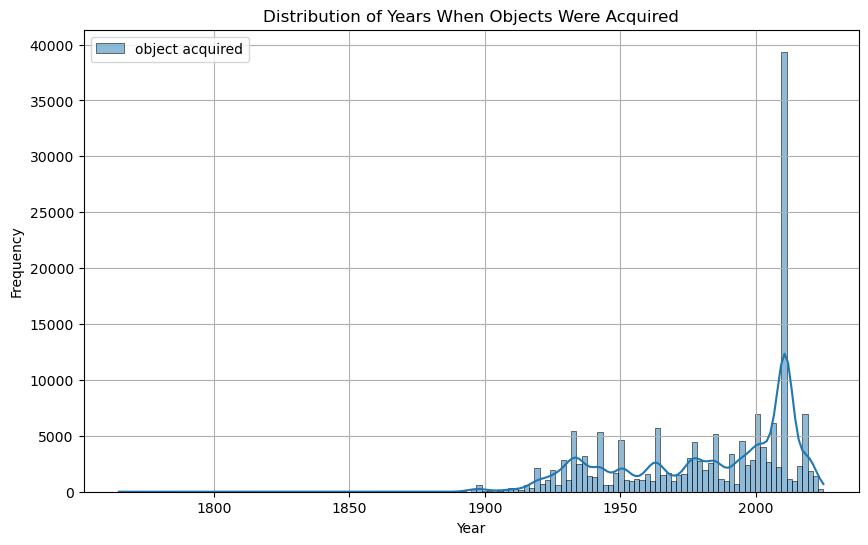

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acession, x='accessionyear', kde=True, label="object acquired")
plt.title('Distribution of Years When Objects Were Acquired')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## We can see that 2011 was a big year for aquisitions, surpassing all other years by over 6 times.
It is possible that this year was a big one for digitizing 

In [200]:
print(df_acession['accessionyear'].value_counts().head())

accessionyear
2011.0    38558
2019.0     6180
2001.0     5301
2007.0     5166
1963.0     5160
Name: count, dtype: int64


## Let's now plot a distribution of years that objects were dated.
The entries in the dated column are non standard. Instead we will use the dateend column for a quick idea of when the objects were made.

In [211]:
print(f"We have {df.shape[0]- df['dateend'].isna().sum()} records with a date.")

We have 245715 records with a date.


In [219]:
#with pd.option_context('display.max_rows', None):
    #print(df['dated'].value_counts())
print(f"There are {(df['dateend']== 0).sum()} values of the datend column with 0's")
print(df['dateend'].value_counts())
    

There are 70691 values of the datend column with 0's
dateend
 0       70691
 1955     7633
 1908     5702
 1959     4881
 1968     3832
         ...  
-111         1
 1277        1
 932         1
 1143        1
 1322        1
Name: count, Length: 2036, dtype: int64


## Now lets plot a histrogram showing a distribution of the year that the objects were dated.

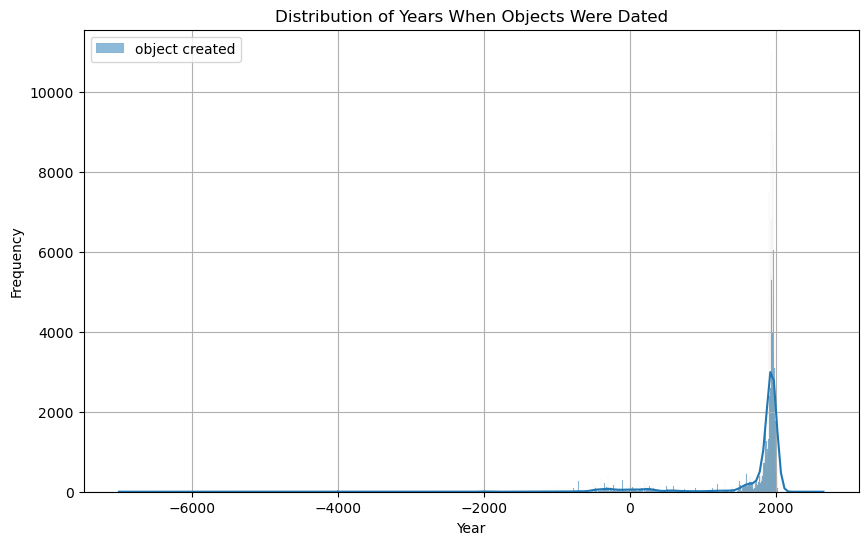

In [248]:
year_df = df[df['dateend']!= 0]
plt.figure(figsize=(10, 6))
sns.histplot(data=year_df, x='dateend', kde=True, label = "object created")
plt.title('Distribution of Years When Objects Were Dated')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Lets Zoom in

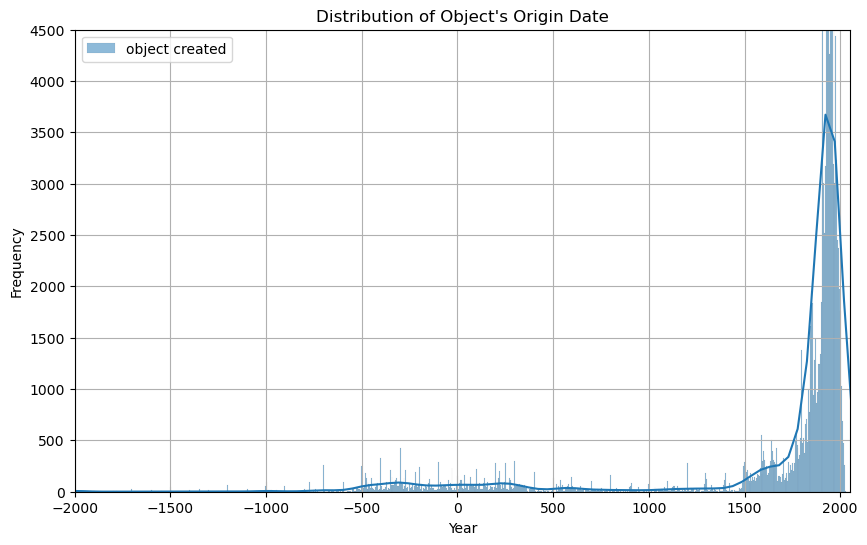

In [246]:

plt.figure(figsize=(10, 6))
sns.histplot(data=year_df , x='dateend', kde=True, bins=2000, label = "object created")
plt.title("Distribution of Object's Origin Date")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xlim(-2000, 2050)
plt.ylim(0, 4500)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


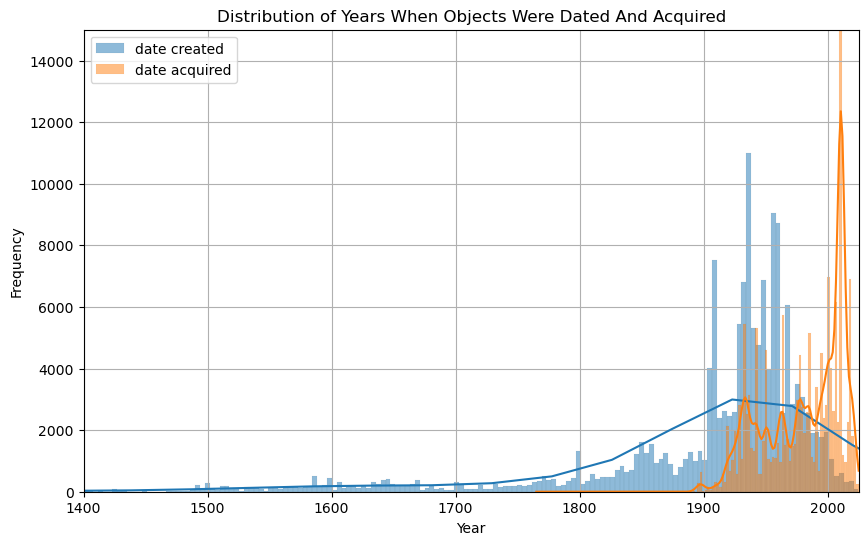

In [260]:

plt.figure(figsize=(10, 6))
sns.histplot(data=year_df, x='dateend', kde=True, label = 'date created')
sns.histplot(data=df_acession, x='accessionyear', kde=True, label = 'date acquired')
plt.title('Distribution of Years When Objects Were Dated And Acquired')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xlim(1400, 2025)
plt.ylim(0, 15000)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Lets see how the collection is distributed in terms of type of object

In [262]:
class_df = pd.DataFrame(df['classification'].value_counts())
display(class_df)
top_class_df = class_df.iloc[0:15]

,count
classification,
Photographs,82940
Prints,69244
Drawings,31037
Coins,18055
Archival Material,8499
Paintings,5920
Vessels,5052
Sculpture,4732
Fragments,3864


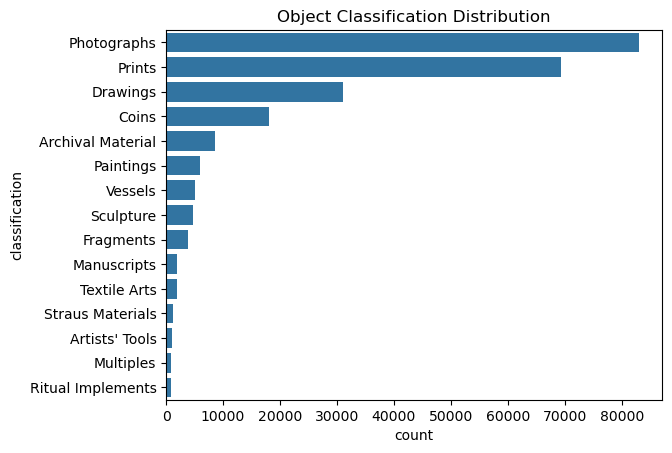

In [264]:
sns.barplot(x='count', y='classification', data=top_class_df, orient='h')
plt.title('Object Classification Distribution')
plt.show()


## If we exclude fine art objects, what does the distribution look like?

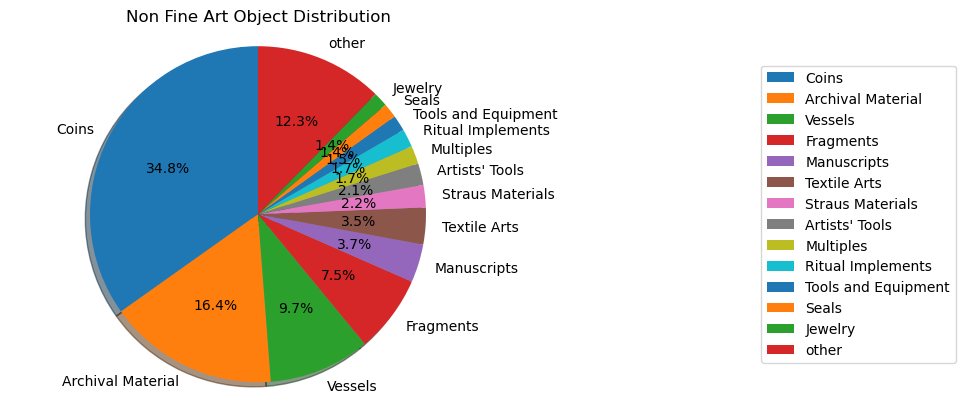

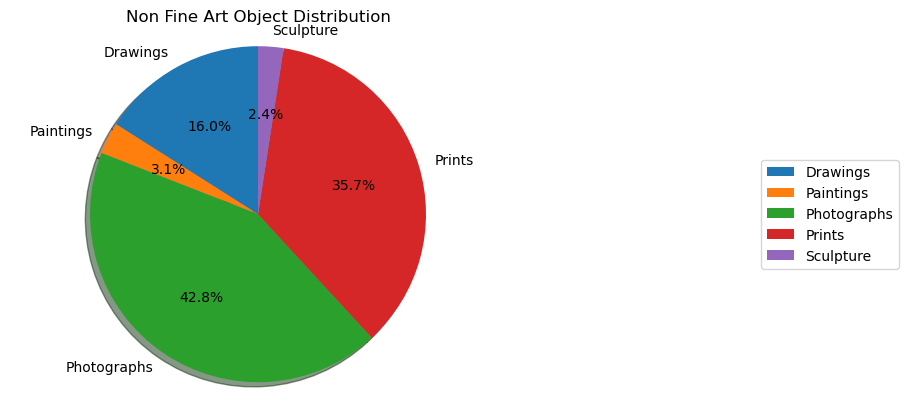

In [269]:
class_df['labels'] = class_df.index
not_fine_df = class_df[~class_df.index.isin(['Photographs', 'Prints', 'Drawings', 'Paintings', 'Sculpture'])]
art_class_df = class_df[class_df.index.isin(['Photographs', 'Prints', 'Drawings', 'Paintings', 'Sculpture'])]

others_num = not_fine_df[not_fine_df['count'] <  600].sum()[0]

new_row_dict = {'count': others_num,  'labels' : 'other'}
new_row_df = pd.DataFrame([new_row_dict])
# Append the new row
not_fine_df = pd.concat([not_fine_df, new_row_df])
top_not_fine_df = not_fine_df[not_fine_df['count']>600]
top_not_fine_df.plot.pie(y='count', labels= top_not_fine_df['labels'], autopct='%1.1f%%', startangle=90, shadow=True, ylabel='')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Non Fine Art Object Distribution')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

art_class_df = art_class_df.sort_index()
art_class_df.plot.pie(y='count', labels= art_class_df['labels'], autopct='%1.1f%%', startangle=90, shadow=True, ylabel='')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Non Fine Art Object Distribution')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

## What division are the objects from?

There are 7597 records with out a division.


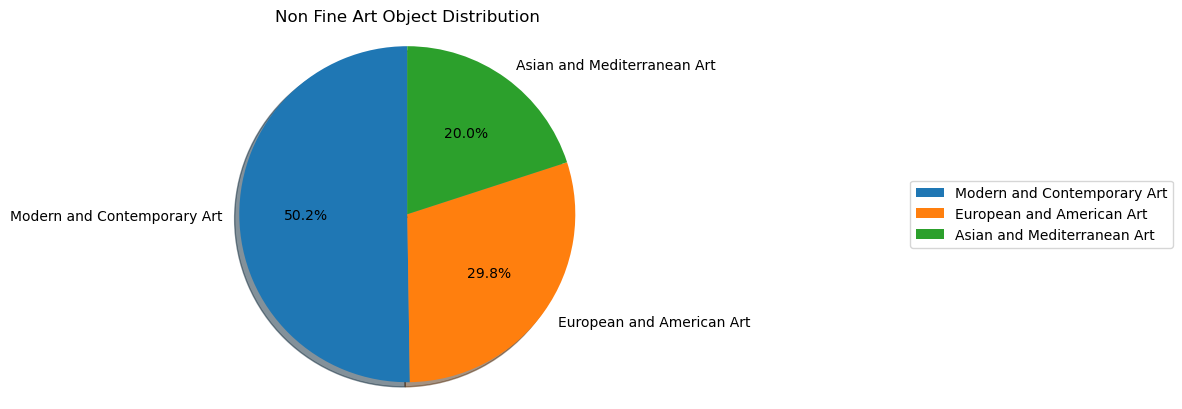

In [668]:
print(f"There are {df['division'].isna().sum()} records with out a division.")
div_df = df[~df['division'].isna()]
div_df = pd.DataFrame(div_df['division'].value_counts())
div_df.plot.pie(y='count', labels= div_df.index, autopct='%1.1f%%', startangle=90, shadow=True, ylabel='')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Non Fine Art Object Distribution')

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

## What 'culture' is the object from?

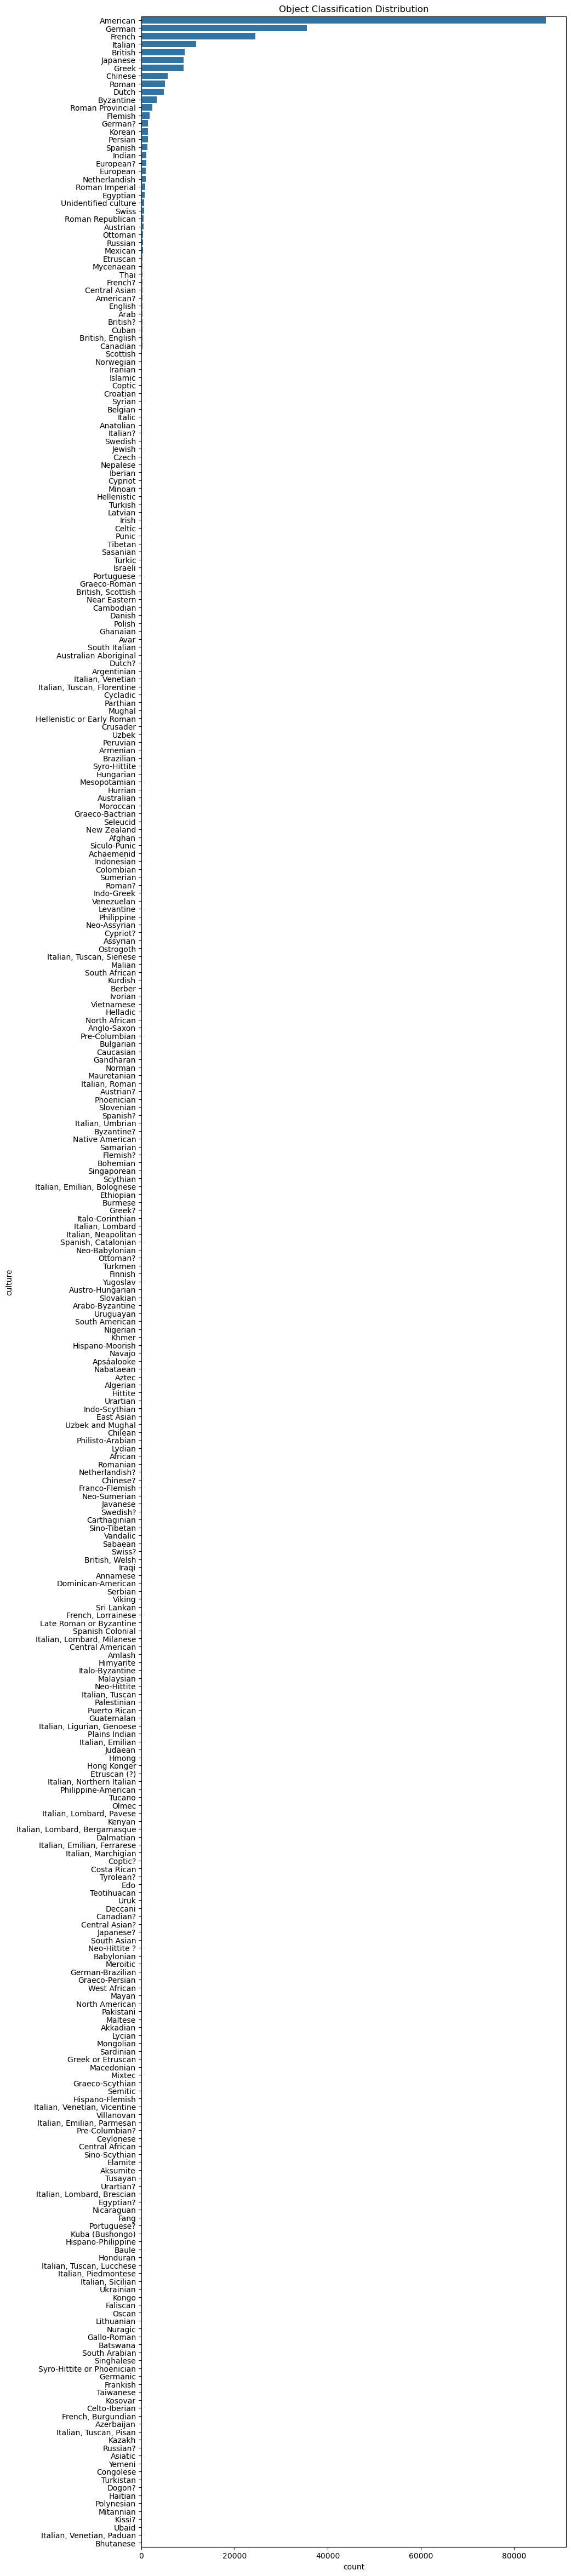

In [315]:
plt.figure(figsize=(10, 60))

culture_df = pd.DataFrame(df['culture'].value_counts())
sns.barplot(x='count', y='culture', data=culture_df, orient='h')
plt.title('Object Classification Distribution')
# Show the plot
plt.show()

## How did objects come into the collection?

,count
accessionmethod,
Gift,127653
Transfer,44245
Not Recorded,31032
Purchase,20250
Bequest,17979
Unidentified,3036
Partial Gift/Partial Purchase,1052
Long Term Loan and Promised Gift,271
Found in Collection,128


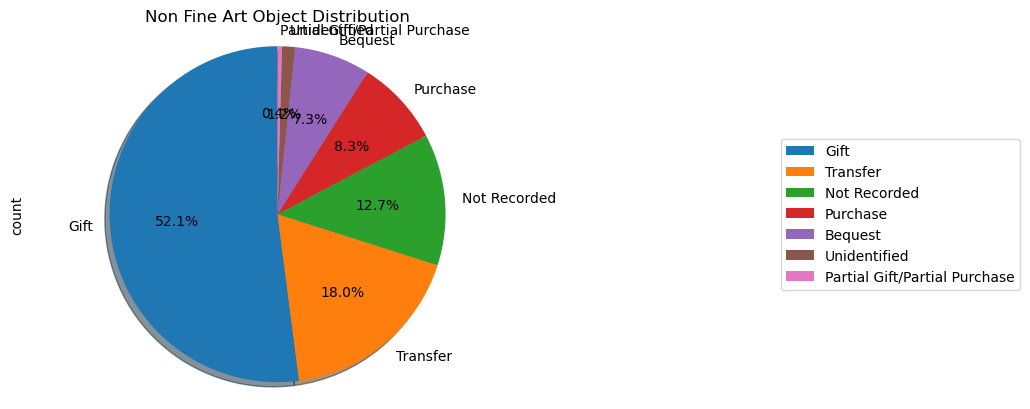

In [764]:
am_df = pd.DataFrame(df['accessionmethod'].value_counts())
display(am_df)
top_am_df = am_df[am_df['count']>1000]
top_am_df.plot.pie(y='count', labels= top_am_df.index, autopct='%1.1f%%', startangle=90, shadow=True)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Non Fine Art Object Distribution')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

## How many records have descriptions? 14.93%

In [277]:
print(f"There are {(~df['description'].isna()).sum()} records that have data in the description field, that is {round(100*(~df['description'].isna()).sum()/len(df),2)} %")
description_df = df[~df['description'].isna()]

There are 36688 records that have data in the description field, that is 14.93 %


## When were these records with descriptions acquired?

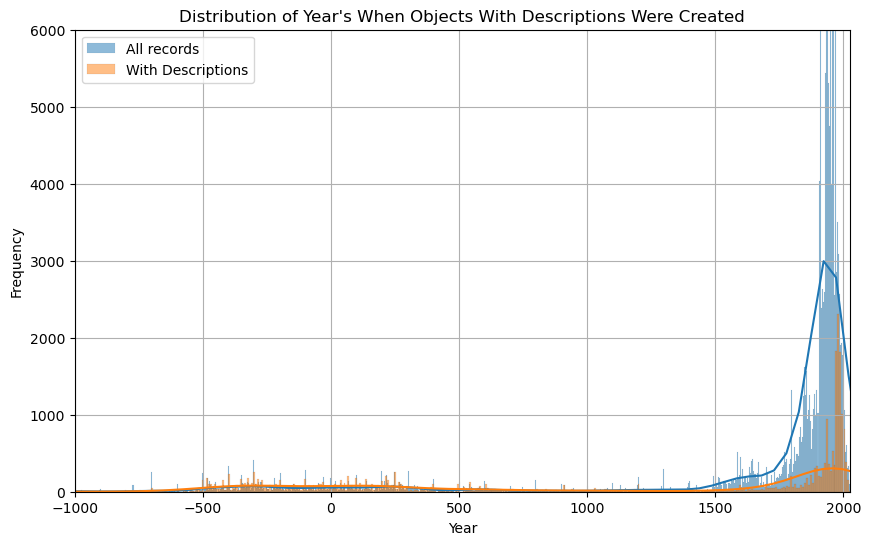

In [291]:
a_description_df = description_df[~description_df['dateend'].isna()]
plt.figure(figsize=(10, 6))
no_0_a_description_df= a_description_df[a_description_df['dateend'] != 0]
sns.histplot(data=year_df, x='dateend', kde=True, label = "All records")
sns.histplot(data=no_0_a_description_df, x='dateend', kde=True, label ="With Descriptions", bins= 1000)

plt.title("Distribution of Year's When Objects With Descriptions Were Created")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 6000)
plt.xlim(-1000, 2025)
plt.grid(True)
plt.show()

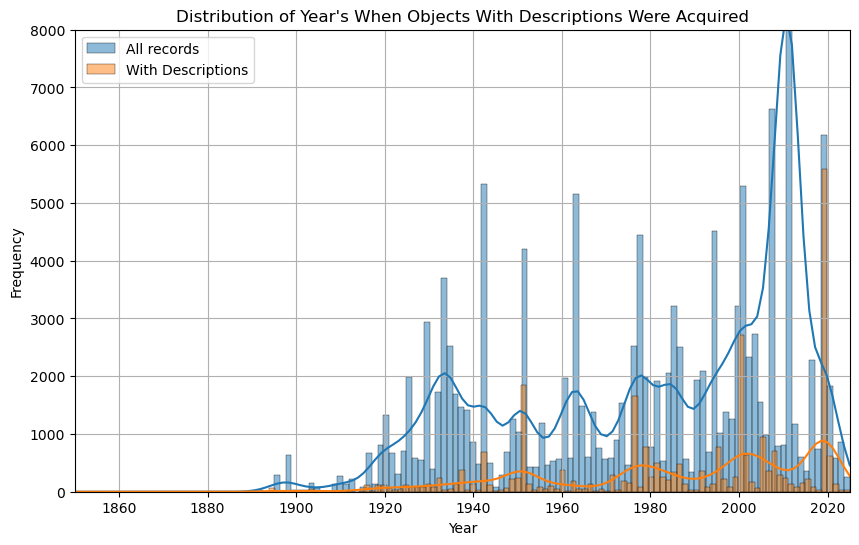

In [309]:

a_description_df = description_df[~description_df['accessionyear'].isna()]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acession, x='accessionyear', kde=True, label = "All records", bins = 200)
sns.histplot(data=a_description_df, x='accessionyear', kde=True, label ="With Descriptions", bins =200)

plt.title("Distribution of Year's When Objects With Descriptions Were Acquired")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 8000)
plt.xlim(1850, 2025)
plt.grid(True)
plt.show()

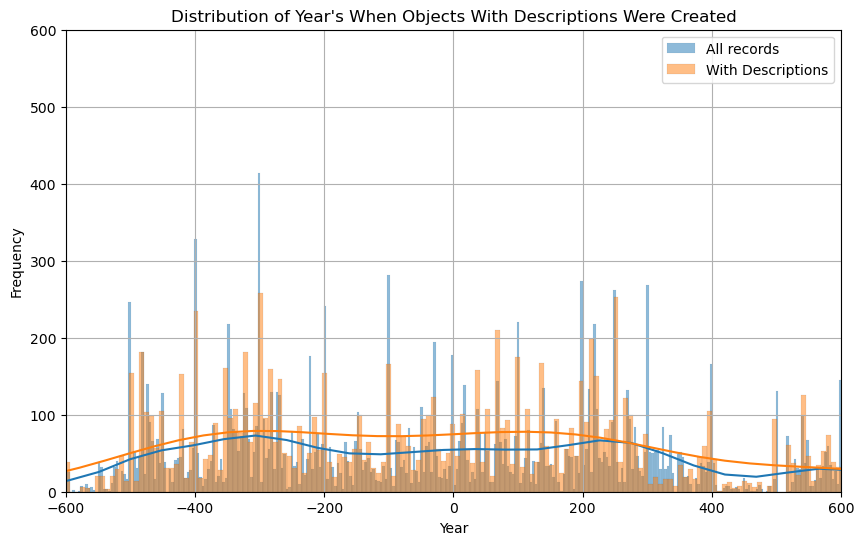

In [289]:
a_description_df = description_df[~description_df['dateend'].isna()]
plt.figure(figsize=(10, 6))
no_0_a_description_df= a_description_df[a_description_df['dateend'] != 0]
sns.histplot(data=year_df, x='dateend', kde=True, label = "All records")
sns.histplot(data=no_0_a_description_df, x='dateend', kde=True, label ="With Descriptions", bins= 1000)

plt.title("Distribution of Year's When Objects With Descriptions Were Created")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 600)
plt.xlim(-600, 600)
plt.grid(True)
plt.show()

## What cultures were the described objects from?

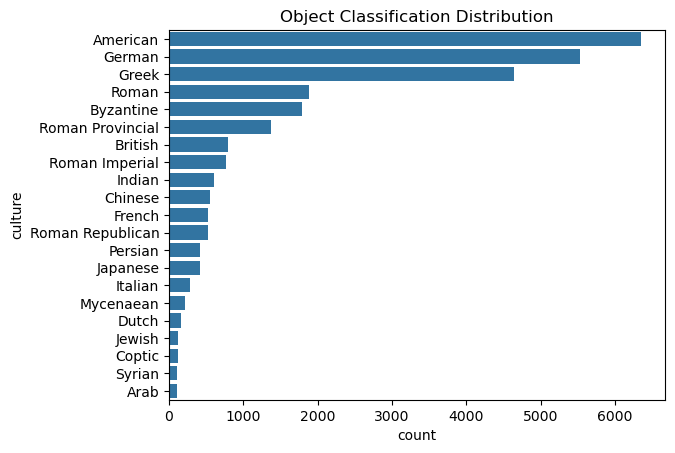

In [311]:
d_culture_df = pd.DataFrame(description_df ['culture'].value_counts())
top_culture_df = d_culture_df[d_culture_df['count']>100]
sns.barplot(x='count', y='culture', data=top_culture_df, orient='h')
plt.title('Object Classification Distribution')
# Show the plot
plt.show()

## Objects that are 'Byzantine', 'Indian', 'Roman Provincial', and 'Roman Imperial' are more likely to have descriptions

In [317]:
print(f"The cultures that have similar distributionsa are {set(culture_df[:10].index.values) & set(d_culture_df[:10].index.values)}")
print(f"The cultures that are featured more often in the descriptions are {set(d_culture_df[:10].index.values) - set(culture_df[:10].index.values)}")


The cultures that have similar distributionsa are {'British', 'Greek', 'German', 'Chinese', 'American', 'Roman'}
The cultures that are featured more often in the descriptions are {'Byzantine', 'Indian', 'Roman Provincial', 'Roman Imperial'}


## How many records have comments? 1%

In [330]:
print(f"There are {(~df['commentary'].isna()).sum()} records that have data in the commentary field. That is {round(100*(~df['commentary'].isna()).sum()/len(df),2)}%")
commentary_df = df[~df['commentary'].isna()]

There are 2424 records that have data in the commentary field. That is 0.99%


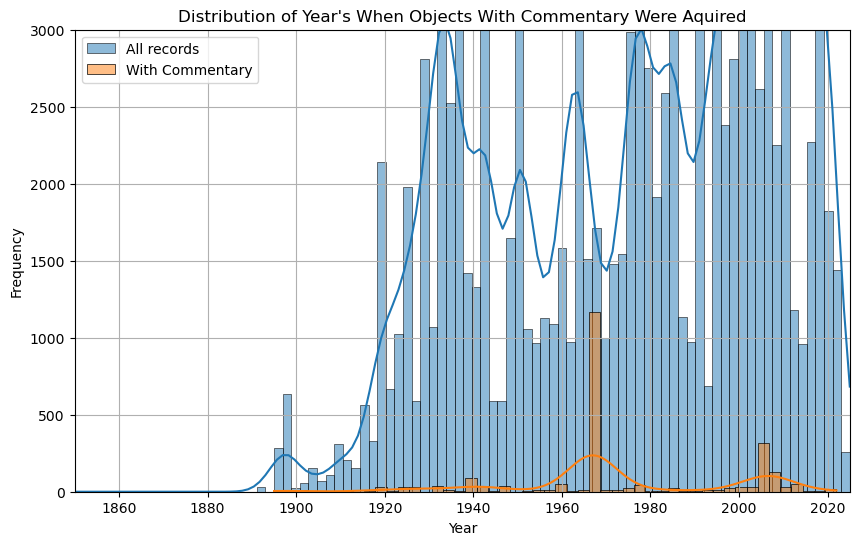

In [334]:
a_commentary_df = commentary_df[~commentary_df['accessionyear'].isna()]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_acession, x='accessionyear', kde=True, label = "All records")
sns.histplot(data=a_commentary_df, x='accessionyear', kde=True, label ="With Commentary", bins = 50)

plt.title("Distribution of Year's When Objects With Commentary Were Aquired")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 3000)
plt.xlim(1850, 2025)
plt.grid(True)
plt.show()

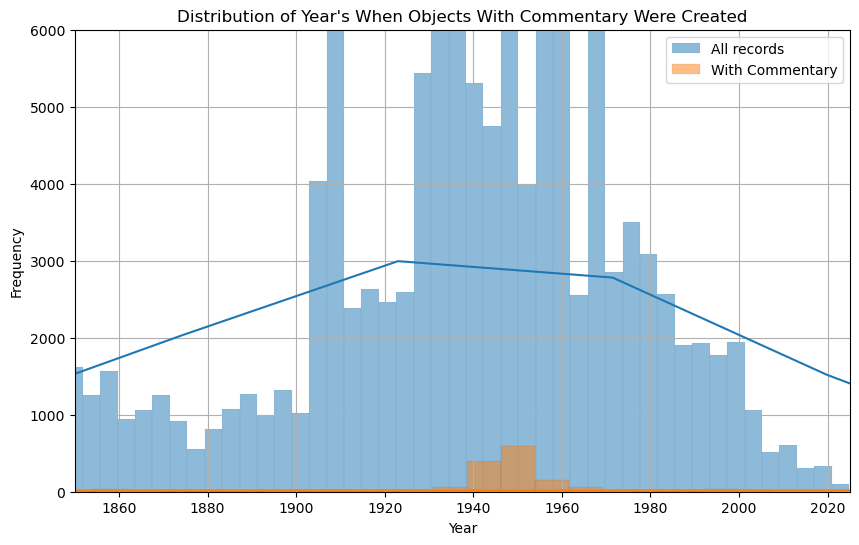

In [340]:
a_commentary_df = commentary_df[~commentary_df['dateend'].isna()]
plt.figure(figsize=(10, 6))
no_0_a_commentary_df= a_commentary_df[a_commentary_df['dateend'] != 0]
sns.histplot(data=year_df, x='dateend', kde=True, label = "All records")
sns.histplot(data=no_0_a_commentary_df, x='dateend', kde=True, label ="With Commentary", bins= 1000)

plt.title("Distribution of Year's When Objects With Commentary Were Created")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 6000)
plt.xlim(1850, 2025)
plt.grid(True)
plt.show()

## What cultures were the objects with commentary from?

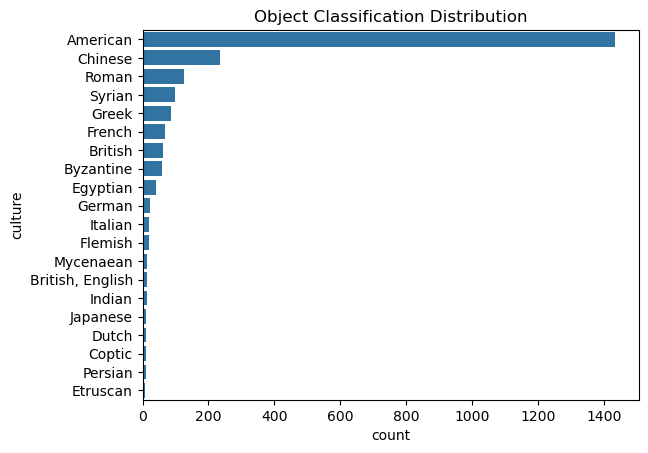

In [342]:
c_culture_df = pd.DataFrame(commentary_df['culture'].value_counts())
top_c_culture_df = c_culture_df[c_culture_df['count']>5]
sns.barplot(x='count', y='culture', data=top_c_culture_df, orient='h')
plt.title('Object Classification Distribution')
# Show the plot
plt.show()

In [346]:
print(f"The cultures that have similar distributionsa are {set(culture_df[:10].index.values) & set(c_culture_df[:10].index.values)}")
print(f"The cultures that are featured more often in the descriptions are {set(c_culture_df[:10].index.values) - set(culture_df[:10].index.values)}")


The cultures that have similar distributionsa are {'French', 'British', 'Greek', 'German', 'Chinese', 'American', 'Roman'}
The cultures that are featured more often in the descriptions are {'Byzantine', 'Syrian', 'Egyptian'}
